# In this notebook we are going to vectorize fake news dataset using Word2vec model

In [1]:
!pip install gensim

In [2]:
import numpy as np
import pandas as pd
import gensim 
from gensim.utils import simple_preprocess as sp
from gensim.models import Word2Vec
import multiprocessing as mp
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [3]:
data = pd.read_csv("WELFake_Dataset.csv")

In [4]:
df = pd.DataFrame(data)
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [5]:
df.isna().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [6]:
df.dropna(subset = ["title" , "text"] , inplace = True)

In [7]:
df.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [8]:
df["full text"] = df["title"] + " " + df["text"]

In [9]:
df

,Unnamed: 0,title,text,label,full text
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,About Time! Christian Group Sues Amazon and SP...
...,...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0,Russians steal research on Trump in hack of U....
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1,WATCH: Giuliani Demands That Democrats Apolog...
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0,Migrants Refuse To Leave Train At Refugee Camp...
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0,Trump tussle gives unpopular Mexican leader mu...


In [10]:
df["full text"][0]

'LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO] No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:3

In [11]:
texts = df["full text"].tolist()

In [12]:
corpus = [ sp(doc = text) for text in texts]

In [13]:
mp.cpu_count()

4

In [14]:
vector_size = 50
window_size = 5
min_word_count = 5
num_workers = mp.cpu_count()

In [15]:
%%capture
model = Word2Vec(
    sentences = corpus,
    vector_size = vector_size,
    window = window_size,
    min_count = min_word_count,
    workers = num_workers,
    epochs = 20,
    sg = 0
    )

In [16]:
model.save("WellFake.Word2Vec.model")

In [17]:
similar_words = model.wv.most_similar("economy" , topn = 5)

In [18]:
similar_words

[('economies', 0.7708853483200073),
 ('growth', 0.7673117518424988),
 ('deficit', 0.7414599061012268),
 ('market', 0.7390817403793335),
 ('recession', 0.7377709150314331)]

In [19]:
print(model.wv['president'])

[ 2.0134943e+00 -3.3612666e+00 -5.4415811e-02 -1.4610369e+00
 -1.1711892e+00  7.0203300e+00  4.6514255e-01 -2.8400373e+00
 -3.0061498e+00 -1.6546506e+00  1.6692795e+00  1.6773337e+00
  9.1324884e-01  4.5206122e+00 -2.6660228e+00  6.0885897e+00
 -2.8666191e+00  2.0592506e+00 -1.9927400e+00 -3.1950305e+00
  5.9702864e+00 -1.3358046e+00  4.7960043e+00 -6.5317118e-01
 -4.2212358e+00 -1.2309747e+00  3.6025844e+00 -2.3384287e+00
 -1.0159733e+00  1.2948479e-01 -3.2784147e+00 -2.9777162e+00
  3.0827906e+00 -5.8894509e-01 -4.0028396e+00 -1.7584506e+00
  1.6814976e+00 -4.1364155e+00  5.1268454e+00  4.2359757e+00
  1.3805952e+00  5.8875027e+00  2.5679686e+00  3.0961283e-04
 -1.2842515e-01  9.2943621e-01 -5.8183236e+00  8.4370011e-01
 -6.0404134e+00 -2.9614029e+00]


In [20]:
print(model.wv.vector_size)

50


In [41]:
first_words = ['trump', 'hillary', 'obama']

second_words =  ['economy', 'market', 'trade']

In [42]:
all_words = first_words + second_words
all_words

['trump', 'hillary', 'obama', 'economy', 'market', 'trade']

In [43]:
model = Word2Vec.load("WellFake.Word2Vec.model")

In [45]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

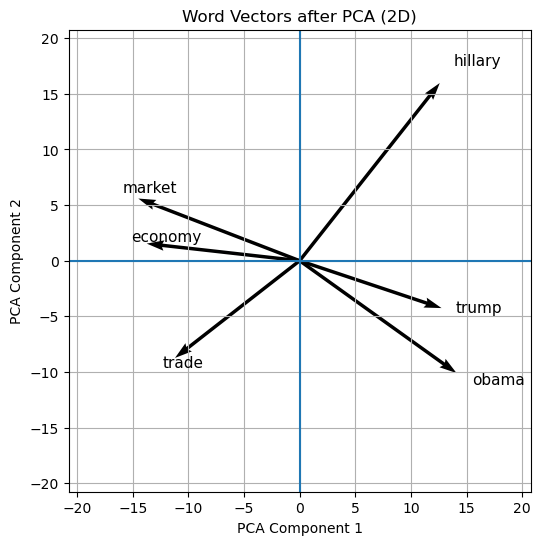

In [46]:
plt.figure(figsize=(6, 6))

for i, word in enumerate(all_words):
    x = X_2d[i, 0]
    y = X_2d[i, 1]
    
    plt.quiver(
        0, 0,
        x, y,
        angles='xy',
        scale_units='xy',
        scale=1
    )
    
    plt.text(x * 1.1, y * 1.1, word, fontsize=11)
max_val = np.max(np.abs(X_2d)) * 1.3

plt.xlim(-max_val, max_val)
plt.ylim(-max_val, max_val)

plt.axhline(0)
plt.axvline(0)

plt.grid(True)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Word Vectors after PCA (2D)')
plt.gca().set_aspect('equal')
plt.show()


## As it's obvious the angle between similar words is a bit too large (like obama and hilary) , so let's test a larger number of windows and see whether the result improve or not!

In [47]:
vector_size = 50
window_size = 5
min_word_count = 10
num_workers = mp.cpu_count()

In [48]:
%%capture
model = Word2Vec(
    sentences = corpus,
    vector_size = vector_size,
    window = window_size,
    min_count = min_word_count,
    workers = num_workers,
    epochs = 20,
    sg = 0
    )

In [49]:
model.save("WellFake.Word2Vec.model")

In [50]:
model = Word2Vec.load("WellFake.Word2Vec.model")

In [51]:
X = np.array([model.wv[word] for word in all_words])

In [52]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

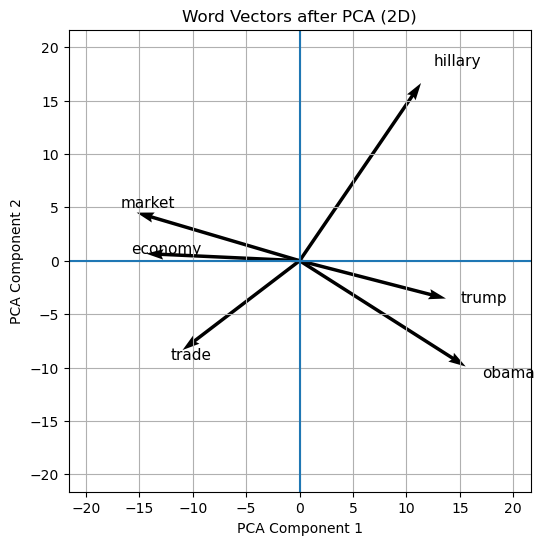

In [53]:
plt.figure(figsize=(6, 6))

for i, word in enumerate(all_words):
    x = X_2d[i, 0]
    y = X_2d[i, 1]
    
    plt.quiver(
        0, 0,
        x, y,
        angles='xy',
        scale_units='xy',
        scale=1
    )
    
    plt.text(x * 1.1, y * 1.1, word, fontsize=11)
max_val = np.max(np.abs(X_2d)) * 1.3

plt.xlim(-max_val, max_val)
plt.ylim(-max_val, max_val)

plt.axhline(0)
plt.axvline(0)

plt.grid(True)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Word Vectors after PCA (2D)')
plt.gca().set_aspect('equal')
plt.show()